In [10]:
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')

In [12]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Exploratory Data Analysis
titanic_train.shape

(891, 12)

In [14]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
titanic_train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

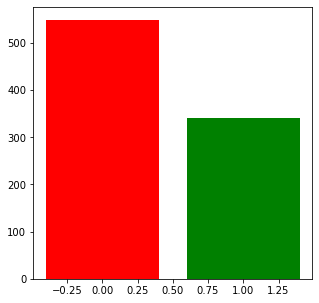

In [19]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=["r","g"])
plt.show()

In [20]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

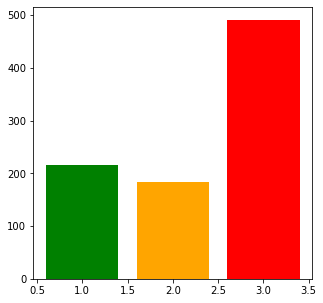

In [25]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["red","green","orange"])
plt.show()

In [22]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

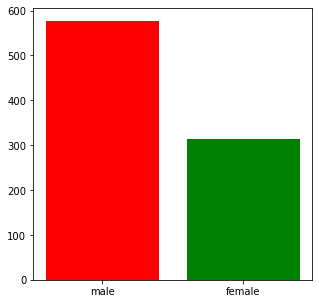

In [23]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=["r","g"])
plt.show()

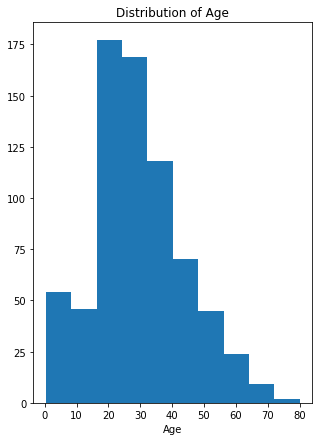

In [26]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

In [28]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [29]:
sum (titanic_train['Survived'].isnull())

0

In [30]:
titanic_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [31]:
sum (titanic_train['Age'].isnull())

177

In [33]:
# remove the null values
titanic_train=titanic_train.dropna()

In [37]:
sum (titanic_train['Age'].isnull())
sum (titanic_train['Survived'].isnull())

0

In [35]:
# survived is dependent variable and age is independent variable 
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']] 

In [36]:
#build model(decision tree classifier)
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()

In [47]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
#predicting values
sum(titanic_test['Age'].isnull())

86

In [41]:
titanic_test=titanic_test.dropna()

In [42]:
sum(titanic_test['Age'].isnull())

0

In [43]:
x_test=titanic_test[['Age']]

In [48]:
y_pred=dtc.predict(x_test)

In [49]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)